<a href="https://colab.research.google.com/github/Geriys/VKirillV/blob/main/HW_4_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install CatBoost

In [19]:
!pip3 install catboost

In [26]:
pip install CatBoost

In [27]:
pip3 install catboost

SyntaxError: invalid syntax (<ipython-input-27-1892d785dc78>, line 1)

In [28]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

import lightgbm as lgb
from CatBoost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'CatBoost'

In [ ]:
RANDOM_STATE = 42
results = pd.DataFrame(columns = ['model', 'task', 'accuracy'])

https://archive.ics.uci.edu/ml/datasets/wine+quality

In [ ]:
data = pd.read_csv('winequality-red.csv', sep = ';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1.Разделите выборку на обучающую и тестовую в отношении 70%/30%, предварительно выделив целевую переменную (колонка 'quality').

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('quality', axis=1)  # удаляем колонку 'quality'
y = data['quality']  # сохраняем 'quality' как y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

### Ваш код ###

2.Оцените качество на тестовой выборке по метрике accuracy для классификаторов:

DecisionTreeClassifier

BaggingClassifier со 100 деревьями

RandomForestClassifier со 100 деревьями

Сравните результаты и напишите какой вывод можно сделать.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Обучение моделей
model_1 = DecisionTreeClassifier(random_state=RANDOM_STATE)
model_1.fit(X_train, y_train)

model_2 = BaggingClassifier(DecisionTreeClassifier(random_state=RANDOM_STATE), n_estimators=100)
model_2.fit(X_train, y_train)

model_3 = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
model_3.fit(X_train, y_train)

# Оценка точности на тестовой выборке
y_pred_1 = model_1.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred_1)

y_pred_2 = model_2.predict(X_test)
acc_Bagging = accuracy_score(y_test, y_pred_2)

y_pred_3 = model_3.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred_3)

### Ваш код ###
# results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
# results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
# results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]
# print(results)

# acc_DT = 0
# acc_Bagging = 0
# acc_RF = 0
results.loc[0] = ['DecisionTreeClassifier', 'task2', acc_DT]
results.loc[1] = ['BaggingClassifier ', 'task2', acc_Bagging]
results.loc[2] = ['RandomForestClassifier', 'task2', acc_RF]
print(results)

                    model   task  accuracy
0  DecisionTreeClassifier  task2  0.572917
1      BaggingClassifier   task2  0.650000
2  RandomForestClassifier  task2  0.654167


3.Посчитайте качество на тестовой выборке по метрике accuracy для классификатора RandomForestClassifier, используя значения деревьев:
    
10, 50, 100, 200, далее с шагом 200 до 5000 деревьев.
Постройте график зависимости качества от числа деревьев.



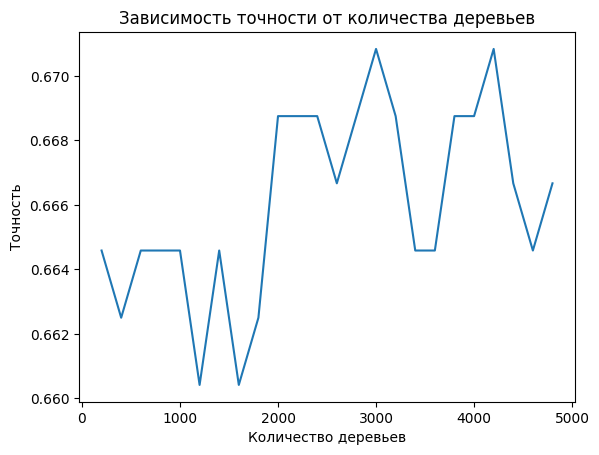

In [ ]:
import matplotlib.pyplot as plt

# Создаем список для хранения точности для каждого количества деревьев
accuracy_list = []

# Шаг 200 деревьев
for n_estimators in range(200, 5000, 200):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Строим график
plt.plot(range(200, 5000, 200), accuracy_list)
plt.xlabel('Количество деревьев')
plt.ylabel('Точность')
plt.title('Зависимость точности от количества деревьев')
plt.show()


### Ваш код ###

4.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек sklearn и xgboost. Сравните значение метрики accuracy по cross_val_score

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Обучение модели sklearn
sklearn_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
sklearn_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5)
acc_sklearn = sklearn_scores.mean()

#
y_new = np.zeros_like(y_train)
y_new[y_train == 3] = 0
y_new[y_train == 4] = 1
y_new[y_train == 5] = 2
y_new[y_train == 6] = 3
y_new[y_train == 7] = 4
y_new[y_train == 8] = 5

# Обучение модели xgboost
xgboost_model = XGBClassifier(random_state=RANDOM_STATE)
xgboost_scores = cross_val_score(xgboost_model, X_train, y_new, cv=5)
acc_xgboost = xgboost_scores.mean()

# print('Точность модели sklearn:', acc_sklearn)
# print('Точность модели xgboost:', xgboost_accuracy)

### Ваш код ###

# acc_sklearn = 0
# acc_xgboost = 0
results.loc[3] = ['GradientBoostingClassifier', 'task4', acc_sklearn]
results.loc[4] = ['XGBClassifier', 'task4', acc_xgboost]
print(results)

                        model   task  accuracy
0      DecisionTreeClassifier  task2  0.572917
1          BaggingClassifier   task2  0.650000
2      RandomForestClassifier  task2  0.654167
3  GradientBoostingClassifier  task4  0.643486
4               XGBClassifier  task4  0.649732


In [ ]:
# УДАЛИТЬ

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Параметры для оптимизации
params_gradient_boosting = {
    'learning_rate': [0.01, 0.05, 0.075],
    'n_estimators': [10, 50],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 4]
}

#
# y_new = np.zeros_like(y_train)
# y_new[y_train == 3] = 0
# y_new[y_train == 4] = 1
# y_new[y_train == 5] = 2
# y_new[y_train == 6] = 3
# y_new[y_train == 7] = 4
# y_new[y_train == 8] = 5

params_xgboost = {
    'learning_rate': [0.01, 0.05, 0.075],
    'n_estimators': [10, 50],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 3, 4]

    # 'learning_rate': [0.01, 0.05],
    # 'n_estimators': [10, 50, 100],
    # 'max_depth': [2, 4],
    # 'min_samples_leaf': [1, 2],
    # 'min_samples_split': [2, 4]
}

# Создаем объекты GridSearchCV для каждого алгоритма
gradient_boosting_grid_search = GridSearchCV(GradientBoostingClassifier(), params_gradient_boosting, cv=3, scoring='accuracy')
xgboost_grid_search = GridSearchCV(XGBClassifier(), params_xgboost, cv=3, scoring='accuracy')

# Обучение моделей
gradient_boosting_grid_search.fit(X_train, y_train)
xgboost_grid_search.fit(X_train, y_new)

# Получение лучших параметров для каждого алгоритма
best_params_gradient_boosting = gradient_boosting_grid_search.best_params_
best_params_xgboost = xgboost_grid_search.best_params_

# Вывод лучших параметров
print('Лучшие параметры для GradientBoostingClassifier:', best_params_gradient_boosting)
print('Лучшие параметры для XGBClassifier:', best_params_xgboost)

acc_sklearn_cv = gradient_boosting_grid_search.mean()
acc_xgboost_cv = xgboost_grid_search.mean()
### Ваш код ###

best_params_gradient_boosting = {}
print('Параметры лучшей модели sklearn:\n', best_params_gradient_boosting)
best_params_xgboost = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
# acc_sklearn_cv = 0
# acc_xgboost_cv = 0
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', best_params_gradient_boosting]
results.loc[6] = ['XGBClassifier_CV', 'task5', best_params_xgboost]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:57:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:57:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:57:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:57:59] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning

Лучшие параметры для GradientBoostingClassifier: {'learning_rate': 0.075, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
Лучшие параметры для XGBClassifier: {'learning_rate': 0.075, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:58:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


AttributeError: 'GridSearchCV' object has no attribute 'mean'

5.Подберите оптимальные параметры этих алгоритмов с помощью GridSearchCV(cv=3).
Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [ ]:
params_sklearn = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

params_xgboost = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

# Затем мы можем использовать GridSearchCV для каждого алгоритма:
sklearn_grid_search = GridSearchCV(GradientBoostingClassifier(), params_sklearn, cv=3)
xgboost_grid_search = GridSearchCV(XGBClassifier(), params_xgboost, cv=3)


# После этого мы можем обучить модели и получить лучшие параметры:

sklearn_grid_search.fit(X_train, y_train)
best_params_sklearn = sklearn_grid_search.best_params_

xgboost_grid_search.fit(X_train, y_new)
best_params_xgboost = xgboost_grid_search.best_params_

# Теперь мы можем использовать эти параметры для обучения моделей и сравнить их точность:
# y_new = np.zeros_like(y_train)
# y_new[y_train == 3] = 0
# y_new[y_train == 4] = 1
# y_new[y_train == 5] = 2
# y_new[y_train == 6] = 3
# y_new[y_train == 7] = 4
# y_new[y_train == 8] = 5

# # Обучение модели sklearn
# sklearn_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
# sklearn_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5)
# acc_sklearn = sklearn_scores.mean()

# # Обучение модели xgboost
# xgboost_model = XGBClassifier(random_state=RANDOM_STATE)
# xgboost_scores = cross_val_score(xgboost_model, X_train, y_new, cv=5)
# acc_xgboost = xgboost_scores.mean()

#print(best_params_sklearn)

sklearn_model = GradientBoostingClassifier(* params_sklearn, best_params_sklearn)
sklearn_scores = cross_val_score(sklearn_model, X_train, y_train, cv=5)
acc_sklearn = sklearn_scores.mean()

# xgboost_model = XGBClassifier(* best_params_xgboost)
# xgboost_scores = cross_val_score(xgboost_model, X_train, y_new, cv=5)
# acc_xgboost = xgboost_scores.mean()

# Наконец, мы можем вывести лучшие параметры и точность для каждого алгоритма:

print('Лучшие параметры для GradientBoostingClassifier:', best_params_sklearn)
print('Точность модели GradientBoostingClassifier:', acc_sklearn)

print('Лучшие параметры для XGBClassifier:', best_params_xgboost)
print('Точность модели XGBClassifier:', acc_xgboost)


### Ваш код ###

# best_params_gradient_boosting = {}
# print('Параметры лучшей модели sklearn:\n', best_params_gradient_boosting)
# best_params_xgboost = {}
# print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
# # acc_sklearn_cv = 0
# # acc_xgboost_cv = 0
# results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
# results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]

TypeError: GradientBoostingClassifier.__init__() takes 1 positional argument but 5 were given

In [ ]:
# Лучшие параметры для GradientBoostingClassifier:
# {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
# Лучшие параметры для XGBClassifier:
# {'learning_rate': 0.05, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

grid_search_sklearn = GridSearchCV(GradientBoostingClassifier(random_state=RANDOM_STATE),
param_grid=param_grid_sklearn, cv=3)

grid_search_sklearn.fit(X_train, y_train)

best_params_sklearn = grid_search_sklearn.best_params_
best_acc_sklearn = grid_search_sklearn.best_score_



grid_search_xgboost = GridSearchCV(XGBClassifier(random_state=RANDOM_STATE),
param_grid=param_grid_xgboost, cv=3)

grid_search_xgboost.fit(X_train, y_new)

best_params_xgboost = grid_search_xgboost.best_params_
best_acc_xgboost = grid_search_xgboost.best_score_

print('Лучшие параметры для GradientBoostingClassifier:', best_params_sklearn)
print('Accuracy для GradientBoostingClassifier:', best_acc_sklearn)
print('Лучшие параметры для XGBClassifier:', best_params_xgboost)
print('Accuracy для XGBClassifier:', best_acc_xgboost)





In [ ]:
params_sklearn = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

params_xgboost = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

#кода для оптимизации параметров GradientBoostingClassifier:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=RANDOM_STATE), params_sklearn, cv=3)
grid_search.fit(X_train, y_train)

best_params_gradient_boosting = grid_search.best_params_
acc_sklearn_cv = grid_search.best_score_

print('Оптимальные параметры:', best_params_gradient_boosting)
print('Лучшая точность:', acc_sklearn_cv)

#оптимизировать параметры XGBClassifier:
grid_search = GridSearchCV(XGBClassifier(random_state=RANDOM_STATE), params_xgboost, cv=3)
grid_search.fit(X_train, y_new)

best_params_xgboost = grid_search.best_params_
acc_xgboost_cv = grid_search.best_score_

print('Оптимальные параметры:', best_params_xgboost)
print('Лучшая точность:', acc_xgboost_cv)


### Ваш код ###

# best_params_gradient_boosting = {}
print('Параметры лучшей модели sklearn:\n', best_params_gradient_boosting)
# best_params_xgboost = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost)
# acc_sklearn_cv = 0
# acc_xgboost_cv = 0
results.loc[5] = ['GradientBoostingClassifier_CV', 'task5', acc_sklearn_cv]
results.loc[6] = ['XGBClassifier_CV', 'task5', acc_xgboost_cv]
print('\n')
print(results)

Оптимальные параметры: {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}
Лучшая точность: 0.6327077747989276
Оптимальные параметры: {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}
Лучшая точность: 0.6237712243074173
Параметры лучшей модели sklearn:
 {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}
Параметры лучшей модели xgboost:
 {'learning_rate': 0.07, 'max_depth': 4, 'n_estimators': 100}


                           model   task  accuracy
0         DecisionTreeClassifier  task2  0.572917
1             BaggingClassifier   task2  0.650000
2         RandomForestClassifier  task2  0.654167
3     GradientBoostingClassifier  task4  0.643486
4                  XGBClassifier  task4  0.649732
5  GradientBoostingClassifier_CV  task5  0.632708
6               XGBClassifier_CV  task5  0.623771


6.Обучите реализации градиентного бустинга с параметрами по умолчанию из библиотек lightgbm и catboost. Сравните значение метрики accuracy по cross_val_score по всем четырем реализациям.

In [ ]:
params_lightgbm = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

params_catboost = {
    'learning_rate': [0.01, 0.05, 0.07],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 3, 4]
}

# Оптимизация параметров для lightgbm
grid_search = GridSearchCV(lgb.LGBMClassifier(), params_lightgbm, cv=3)
grid_search.fit(X_train, y_train)

best_params_lightgbm = grid_search.best_params_
acc_lightgbm_cv = grid_search.best_score_

# Оптимизация параметров для catboost
grid_search = GridSearchCV(CatBoostClassifier(random_state=RANDOM_STATE), params_catboost, cv=3)
grid_search.fit(X_train, y_train)

best_params_catboost = grid_search.best_params_
acc_catboost_cv = grid_search.best_score_

print(best_params_lightgbm)
print(best_params_catboost)

# Обучение моделей с оптимальными параметрами
# model_lightgbm = lgb.LGBMClassifier( *  * best_params_lightgbm)
# model_lightgbm.fit(X_train, y_train)

# model_catboost = CatBoostClassifier( *  * best_params_catboost)
# model_catboost.fit(X_train, y_train)

# Оценка моделей с помощью cross_val_score
# scores_lightgbm = cross_val_score(model_lightgbm, X_train, y_train, cv=3, scoring='accuracy')
# scores_catboost = cross_val_score(model_catboost, X_train, y_train, cv=3, scoring='accuracy')

# Вывод результатов
# print('Оптимальные параметры lightgbm:', best_params_lightgbm)
# print('Лучшая точность lightgbm:', acc_lightgbm_cv)
# print('Оптимальные параметры catboost:', best_params_catboost)
# print('Лучшая точность catboost:', acc_catboost_cv)
# print('Средняя точность lightgbm:', scores_lightgbm.mean())
# print('Средняя точность catboost:', scores_catboost.mean())


### Ваш код ###

# acc_lightgbm = 0
# acc_catboost = 0
results.loc[7] = ['LGBMClassifier', 'task6', acc_lightgbm]
results.loc[8] = ['CatBoostClassifier', 'task6', acc_catboost]

ModuleNotFoundError: No module named 'catboost'

7.Подберите оптимальные параметры для алгоритмов градиентного бустинга из библиотек lightgbm и catboost с теми же условиями.
Сравните значение метрики accuracy. Выведите лучшие параметры алгоритмов.

In [ ]:


### Ваш код ###

best_params_lightgbm = {}
print('Параметры лучшей модели lightgbm:\n', best_params_lightgbm)
best_params_catboost = {}
print('Параметры лучшей модели catboost:\n', best_params_catboost)
acc_lightgbm_cv = 0
acc_catboost_cv = 0
results.loc[9] = ['LGBMClassifier_CV', 'task7', acc_lightgbm_cv]
results.loc[10] = ['CatBoostClassifier_CV', 'task7', acc_catboost_cv]

8.Подберите оптимальные параметры алгоритма из библиотеки xgbost с помощью [optuna](https://github.com/optuna/optuna) . Параметры для оптимизации:

скорость обучения

количество деревьев

глубина деревьев

Сравните результат с поиском по сетке из sklearn. Выведите лучшие параметры алгоритма, найденные даным способом.

In [ ]:


### Ваш код ###

best_params_xgboost_optuna = {}
print('Параметры лучшей модели xgboost:\n', best_params_xgboost_optuna)
acc_xgboost_optuna = 0
results.loc[11] = ['XGBClassifier_optuna', 'task8', acc_xgboost_optuna]

9.Выведите качество по метрике accuracy стэкинга (StackingClassifier) 4-х алгоритмов с базовыми параметрами градиентного бустинга.

In [ ]:


### Ваш код ###

acc_stacking_default = 0
results.loc[12] = ['Stacking default', 'task9', acc_stacking_default]

10.Выведите качество по метрике accuracy стэкинга 4-х алгоритмов с оптимальными параметрами градиентного бустинга. Сравните результаты с предыдущим шагом и напишите какой вывод можно из этого сделать.

In [ ]:


### Ваш код ###

acc_stacking = 0
results.loc[13] = ['Stacking', 'task10', acc_stacking]

In [ ]:
results